# CP2K - H2O-256

Results from the [CP2K](https://www.cp2k.org/) quantum chemistry and solid state physics package for atomistic simulations using the H20-256 benchmark distributed with the source code.

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, display_markdown

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show:
- `runtime_real`: time for the entire MPI job
- `cp2k_time`: time for the CP2K subroutine, as measured by CP2K itself (`"Total Max"` in output file)

Both of these are wallclock time in seconds, with lower values being better performance. 

1.1.3


### Cp2k_H2O_256: runtime_real

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,alaska:[roce/ib]-gcc9-openmpi4-ucx
num_nodes,,,
1,673.090,686.086,1.02
2,444.761,497.114,1.12
4,278.479,313.387,1.13
8,160.875,210.867,1.31
16,130.180,152.166,1.17


### Cp2k_H2O_256: cp2k_time

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,alaska:[roce/ib]-gcc9-openmpi4-ucx
num_nodes,,,
1,666.497,679.782,1.02
2,437.873,489.595,1.12
4,271.379,305.771,1.13
8,155.907,203.405,1.30
16,123.128,146.596,1.19


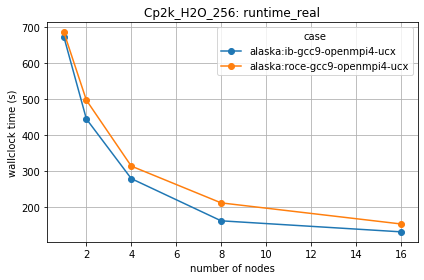

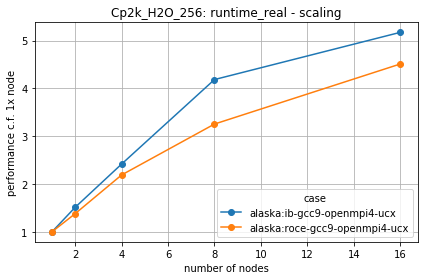

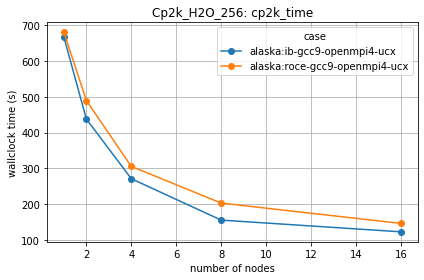

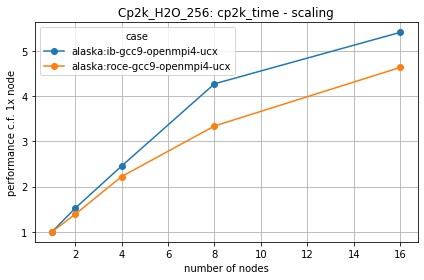

In [7]:
print(pd.__version__)

for var in ['runtime_real', 'cp2k_time']:
    df = modules.utils.tabulate_last_perf('Cp2k_H2O_256_*', 'num_nodes', var)
    
    title = 'Cp2k_H2O_256: %s' % var
    display_markdown('### %s' % title, raw=True)
    
    ax = df.plot(grid=True, style='o-')#, secondary_y=[c for c in df.columns if 'scaling' in c])
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('wallclock time (s)')
    ax.set_title(title)
    plt.tight_layout()
    
    scaling = (df.iloc[0] / df)
    scaling_ax = scaling.plot(grid=True, style='o-',
                              title='%s - scaling' % title, xlabel='number of nodes', ylabel='performance c.f. 1x node')
    plt.tight_layout()    
    
    modules.plots.add_roce_ib_factor(df)
    display(df)
    